In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (18,12)

In [3]:
df = pd.read_csv('tracks_features.csv')
df = df[df['year'] >= 1923]
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


#### Quantidades

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203880 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1203880 non-null  object 
 1   name              1203880 non-null  object 
 2   album             1203880 non-null  object 
 3   album_id          1203880 non-null  object 
 4   artists           1203880 non-null  object 
 5   artist_ids        1203880 non-null  object 
 6   track_number      1203880 non-null  int64  
 7   disc_number       1203880 non-null  int64  
 8   explicit          1203880 non-null  bool   
 9   danceability      1203880 non-null  float64
 10  energy            1203880 non-null  float64
 11  key               1203880 non-null  int64  
 12  loudness          1203880 non-null  float64
 13  mode              1203880 non-null  int64  
 14  speechiness       1203880 non-null  float64
 15  acousticness      1203880 non-null  float64
 16  

In [5]:
df.groupby(['year']).count()[90:101]

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date
year,,,,,,,,,,,,,,,,,,,,,
2016,47427,47427,47427,47427,47427,47427,47427,47427,47427,47427,...,47427,47427,47427,47427,47427,47427,47427,47427,47427,47427
2017,51308,51308,51308,51308,51308,51308,51308,51308,51308,51308,...,51308,51308,51308,51308,51308,51308,51308,51308,51308,51308
2018,56167,56167,56167,56167,56167,56167,56167,56167,56167,56167,...,56167,56167,56167,56167,56167,56167,56167,56167,56167,56167
2019,67276,67276,67276,67276,67276,67276,67276,67276,67276,67276,...,67276,67276,67276,67276,67276,67276,67276,67276,67276,67276
2020,69726,69726,69726,69726,69726,69726,69726,69726,69726,69726,...,69726,69726,69726,69726,69726,69726,69726,69726,69726,69726


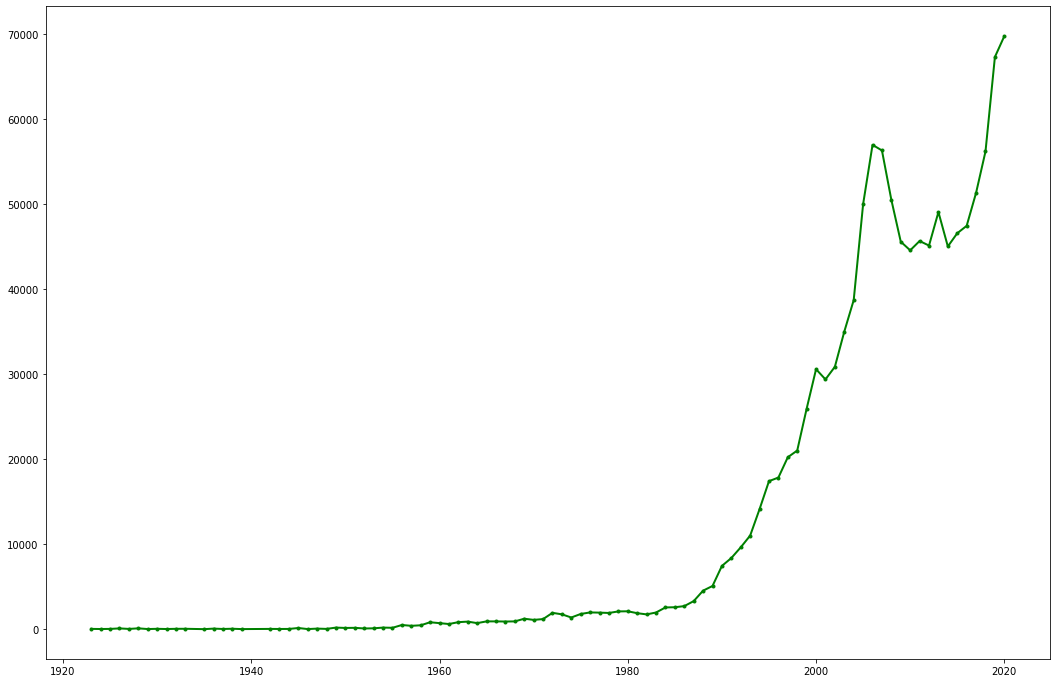

In [6]:
quantidades = df.groupby(by='year').count()['id'].reset_index()

plt.plot('year', 'id', data=quantidades, marker='.', color='green', linewidth=2)

#### Duração das músicas

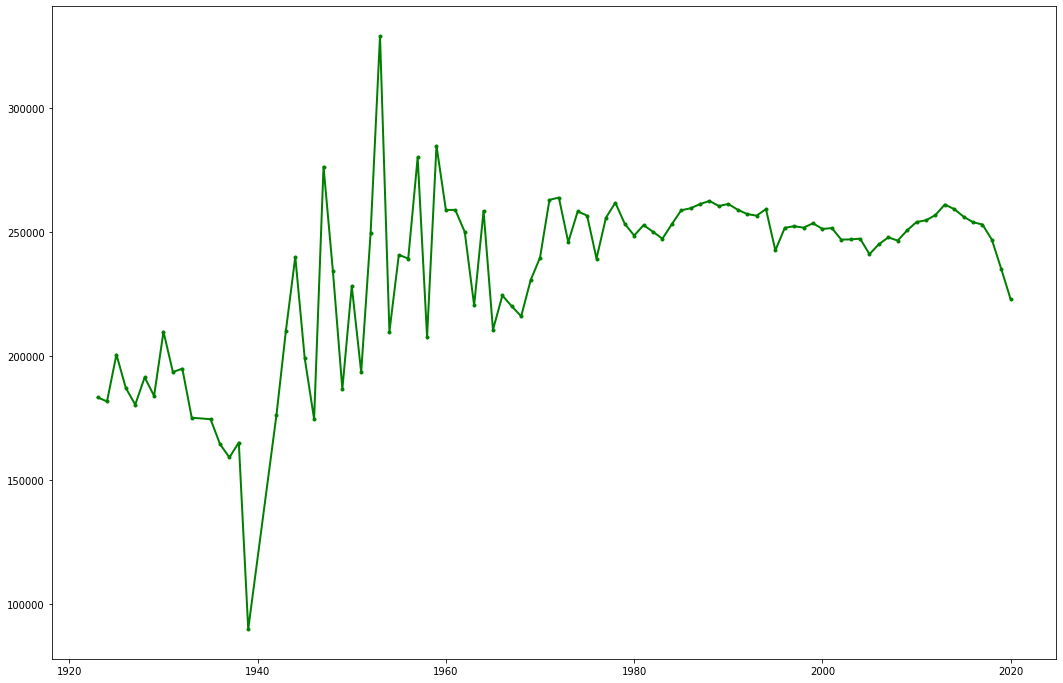

In [7]:
duration_ms = df.groupby(by='year').mean()['duration_ms'].reset_index()

plt.plot('year', 'duration_ms', data=duration_ms, marker='.', color='green', linewidth=2)

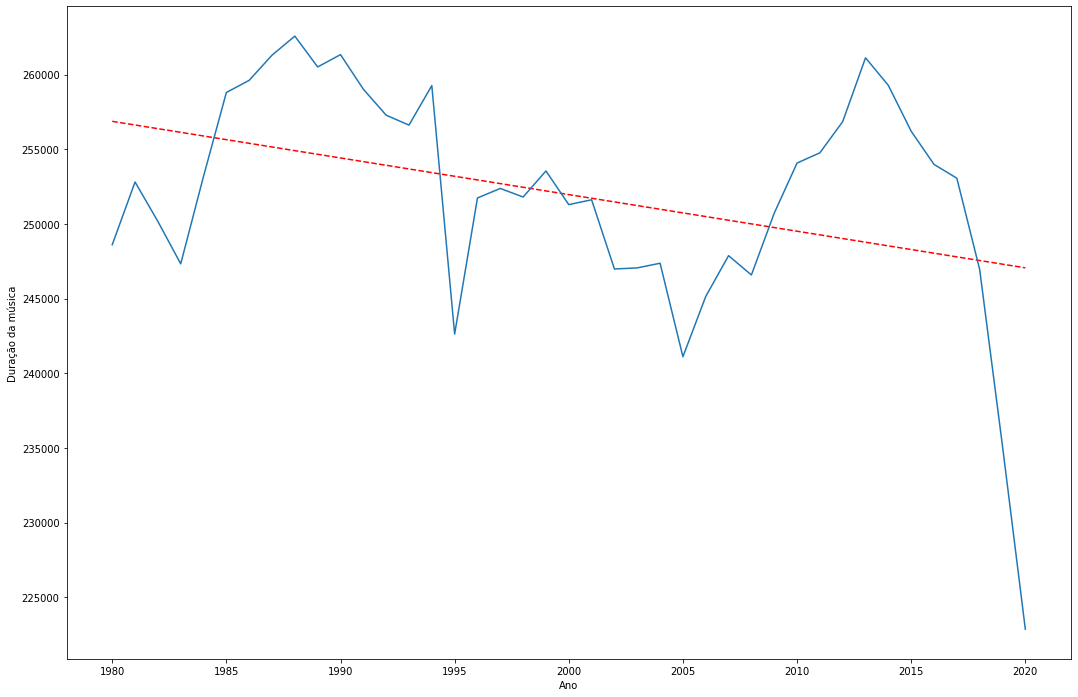

In [8]:
duration_ms_1980_2020 = duration_ms[duration_ms['year'] >= 1980]

z = np.polyfit(duration_ms_1980_2020['year'], duration_ms_1980_2020['duration_ms'], 1)
p = np.poly1d(z)
plt.plot(duration_ms_1980_2020['year'],p(duration_ms_1980_2020['year']),"r--")
plt.plot(duration_ms_1980_2020['year'], duration_ms_1980_2020['duration_ms'])

plt.xlabel("Ano")
plt.ylabel("Duração da música")
plt.show()

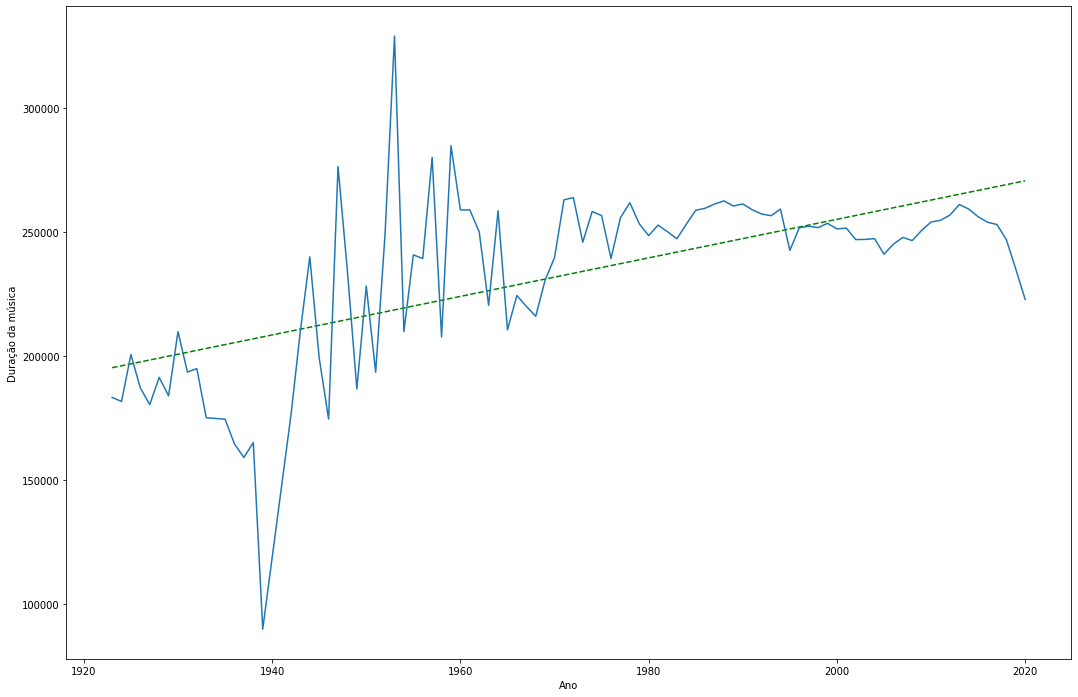

In [9]:
z = np.polyfit(duration_ms['year'], duration_ms['duration_ms'], 1)
p = np.poly1d(z)
plt.plot(duration_ms['year'],p(duration_ms['year']),"g--")
plt.plot(duration_ms['year'], duration_ms['duration_ms'])

plt.xlabel("Ano")
plt.ylabel("Duração da música")
plt.show()

#### Danceability

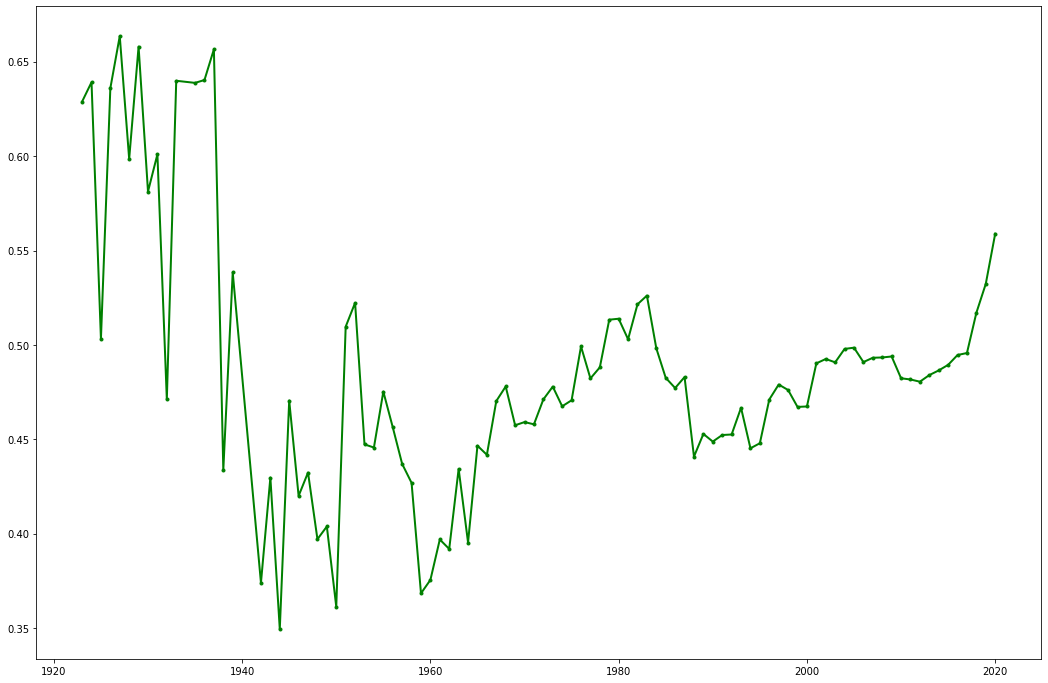

In [10]:
danceability = df.groupby(by='year').mean()['danceability'].reset_index()

plt.plot('year', 'danceability', data=danceability, marker='.', color='green', linewidth=2)

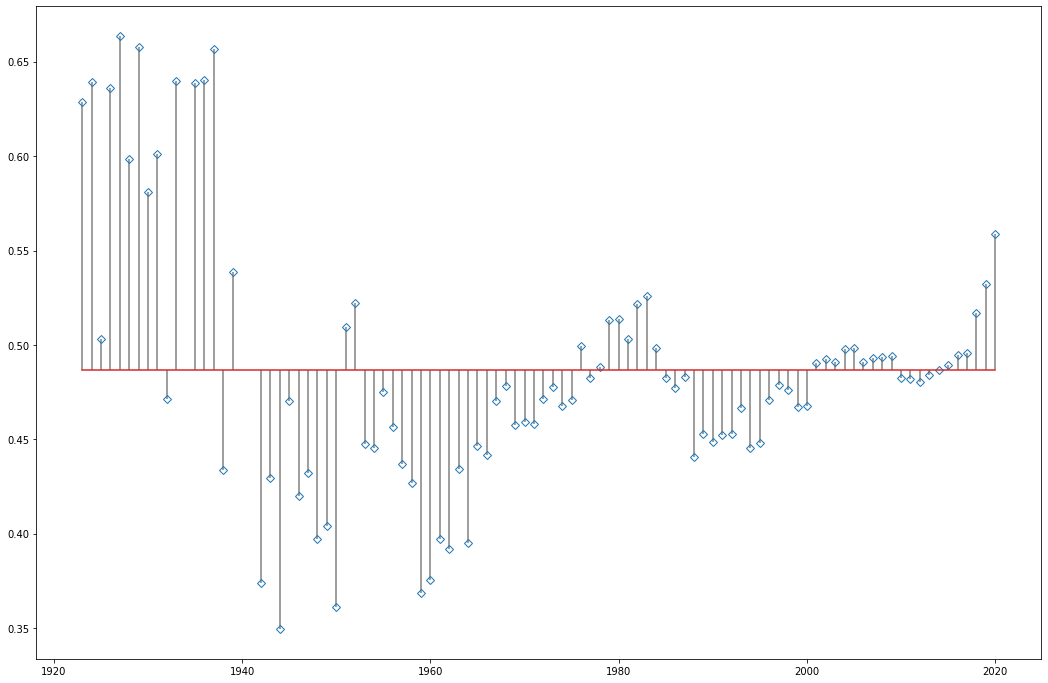

In [11]:
markerline, stemlines, baseline = plt.stem(
    danceability['year'], danceability['danceability'], linefmt='grey', markerfmt='D', bottom=danceability['danceability'].mean())
markerline.set_markerfacecolor('none')
plt.show()

#### Acousticness

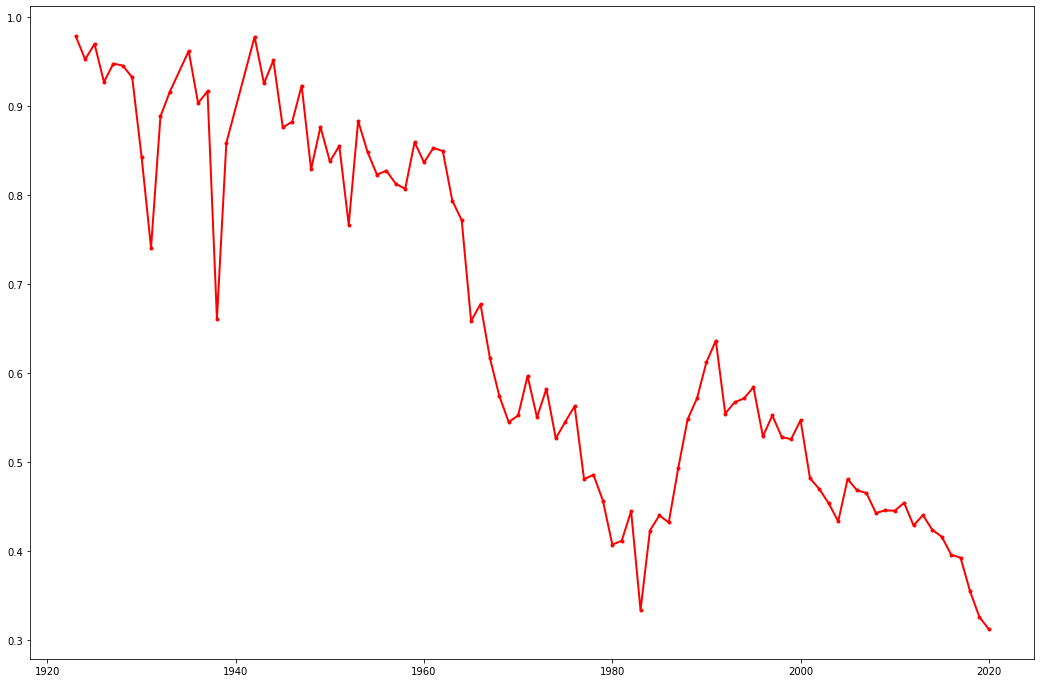

In [12]:
acousticness = df.groupby(by='year').mean()['acousticness'].reset_index()

plt.plot('year', 'acousticness', data=acousticness, marker='.', color='red', linewidth=2)

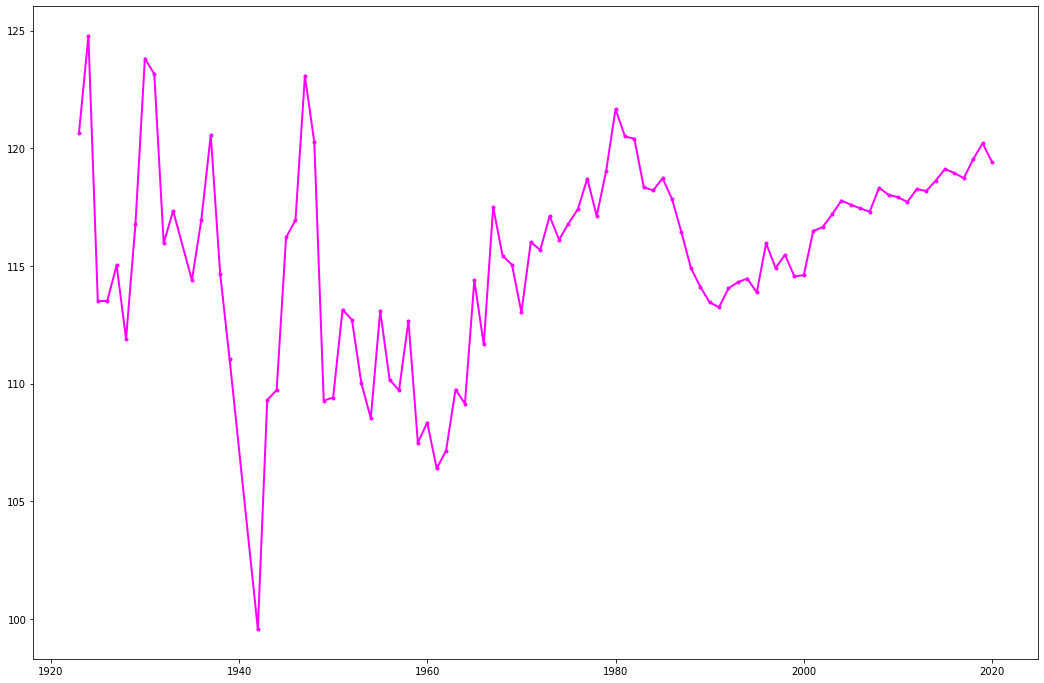

In [13]:
tempo = df.groupby(by='year').mean()['tempo'].reset_index()

plt.plot('year', 'tempo', data=tempo, marker='.', color='magenta', linewidth=2)

#### Sentimento de felicidade

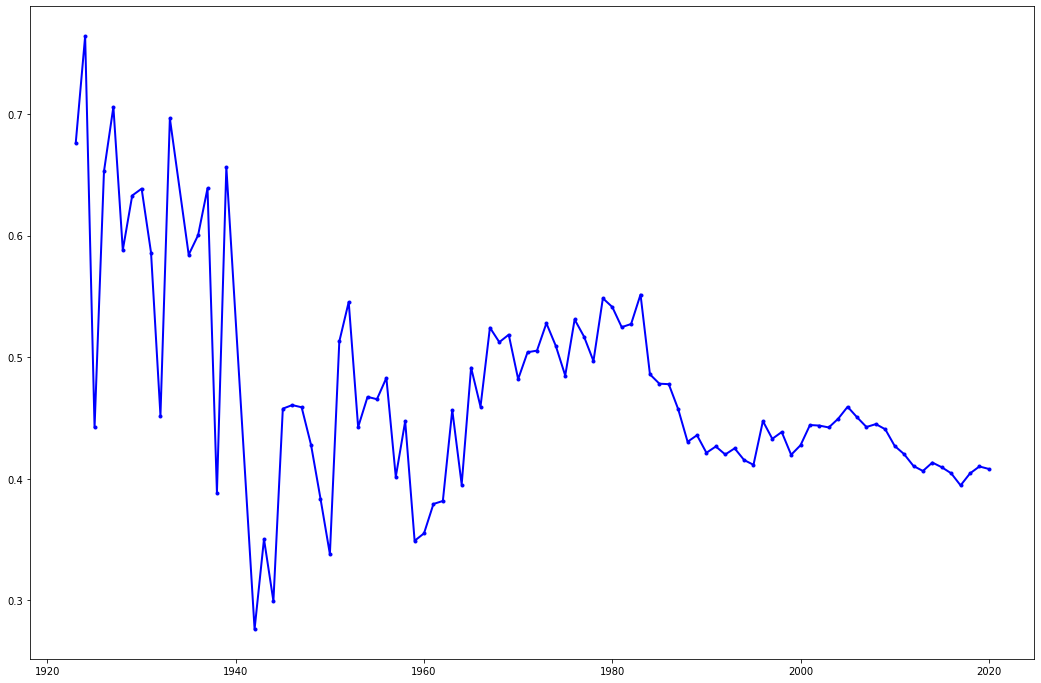

In [14]:
valence = df.groupby(by='year').mean()['valence'].reset_index()

plt.plot('year', 'valence', data=valence, marker='.', color='blue', linewidth=2)

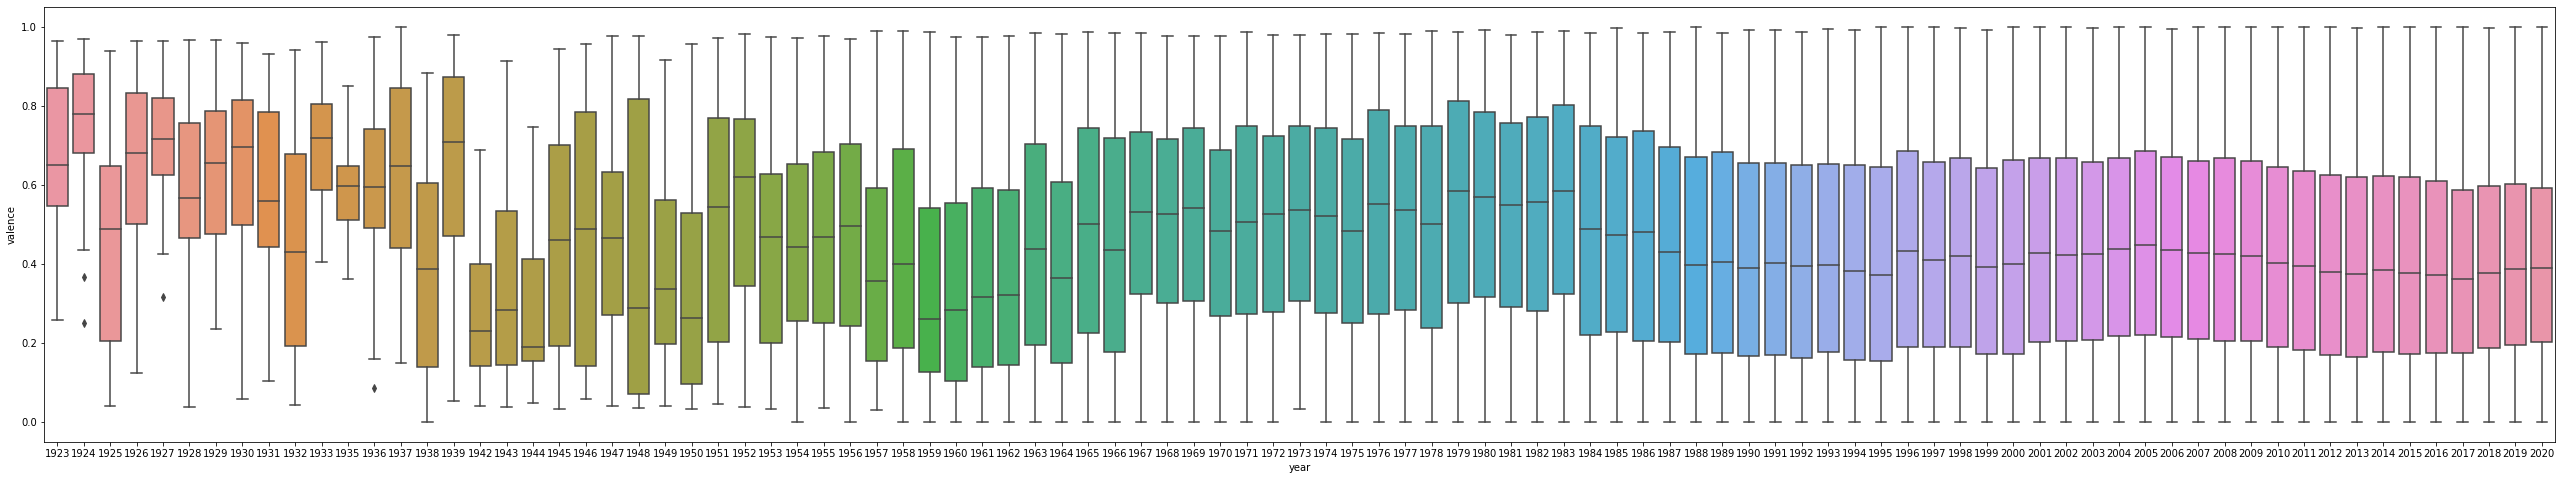

In [15]:
plt.figure(figsize=(45,8))
ax = sns.boxplot(x="year", y="valence", data=df)

### Loudness

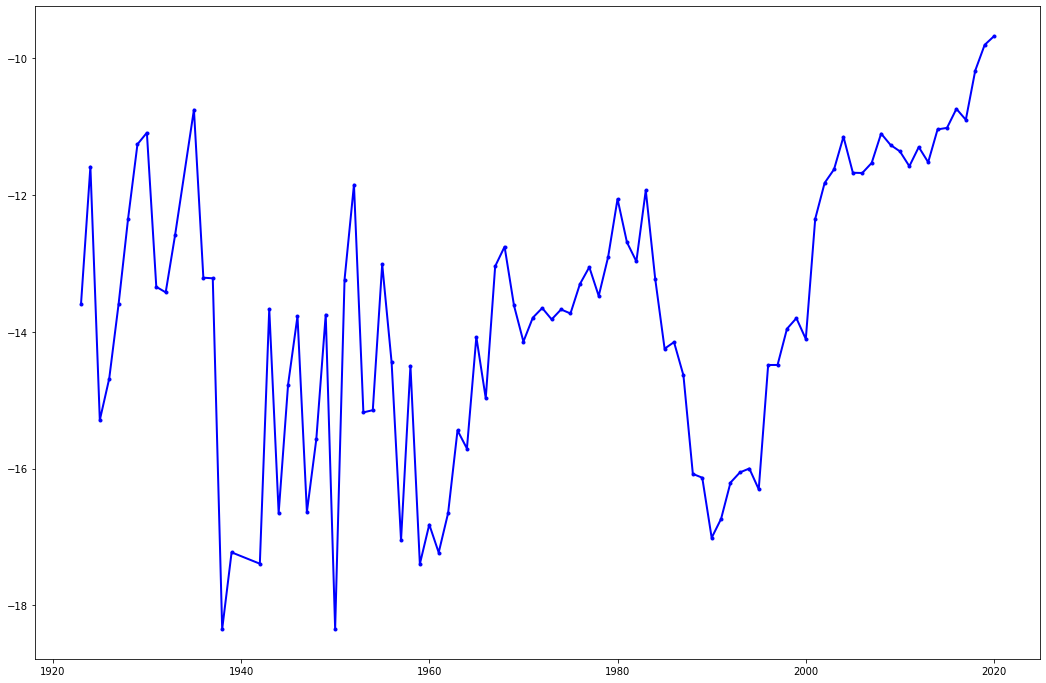

In [16]:
loudness = df.groupby(by='year').mean()['loudness'].reset_index()

plt.plot('year', 'loudness', data=loudness, marker='.', color='blue', linewidth=2)

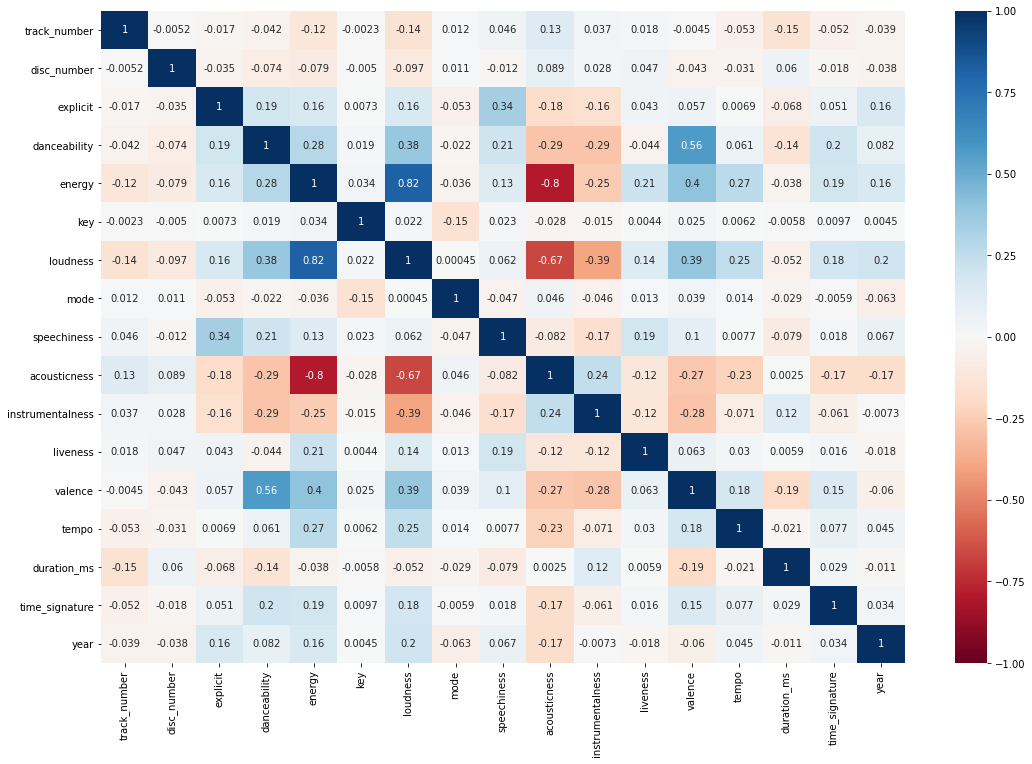

In [17]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu')

In [18]:
print(df['explicit'].unique())
print(df['key'].unique())

[False  True]
[ 7 11  2  9  6  4  1  0  8 10  5  3]
